In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
import numpy as np

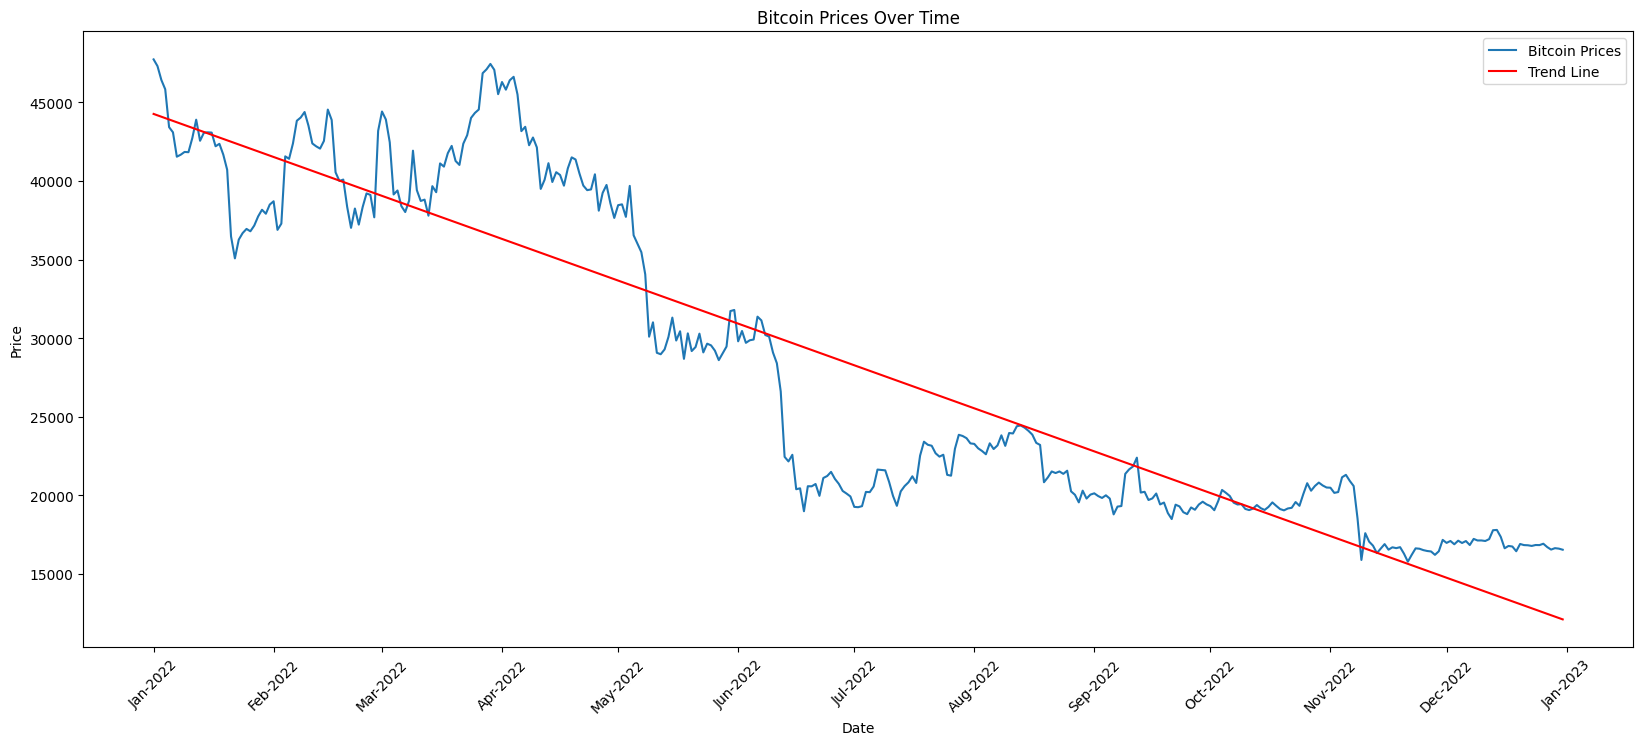

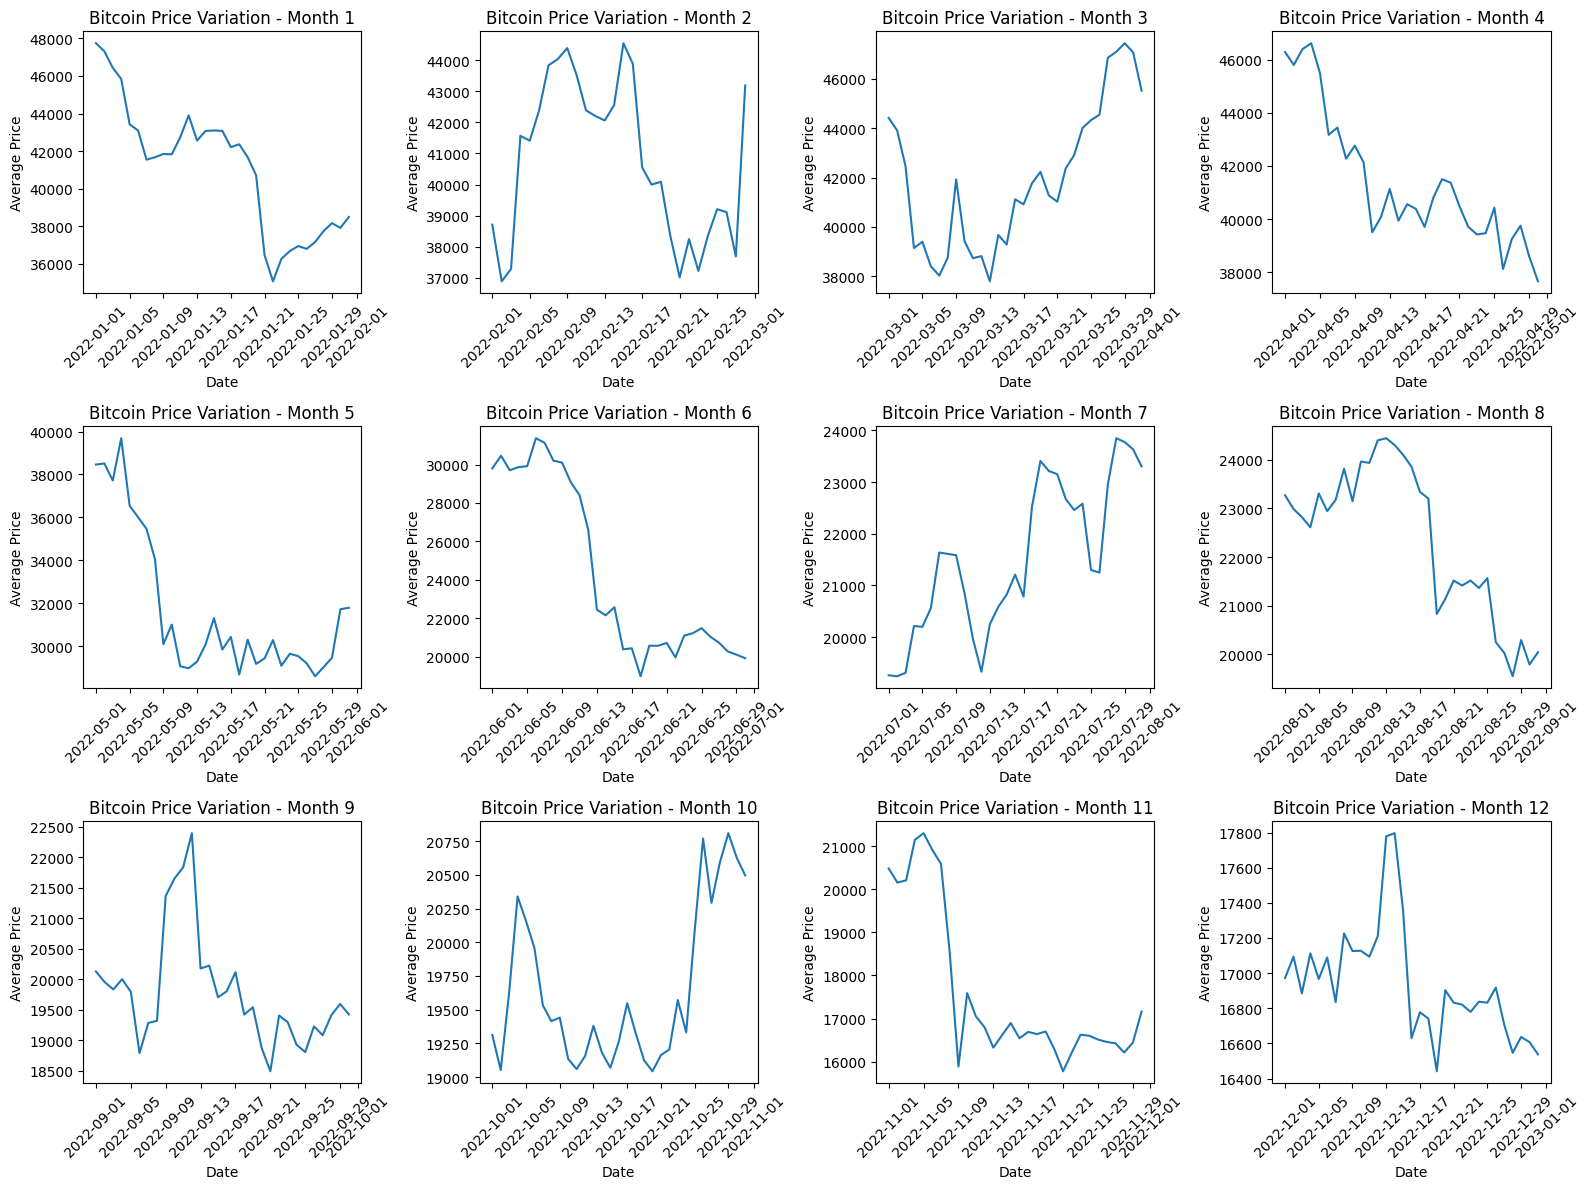

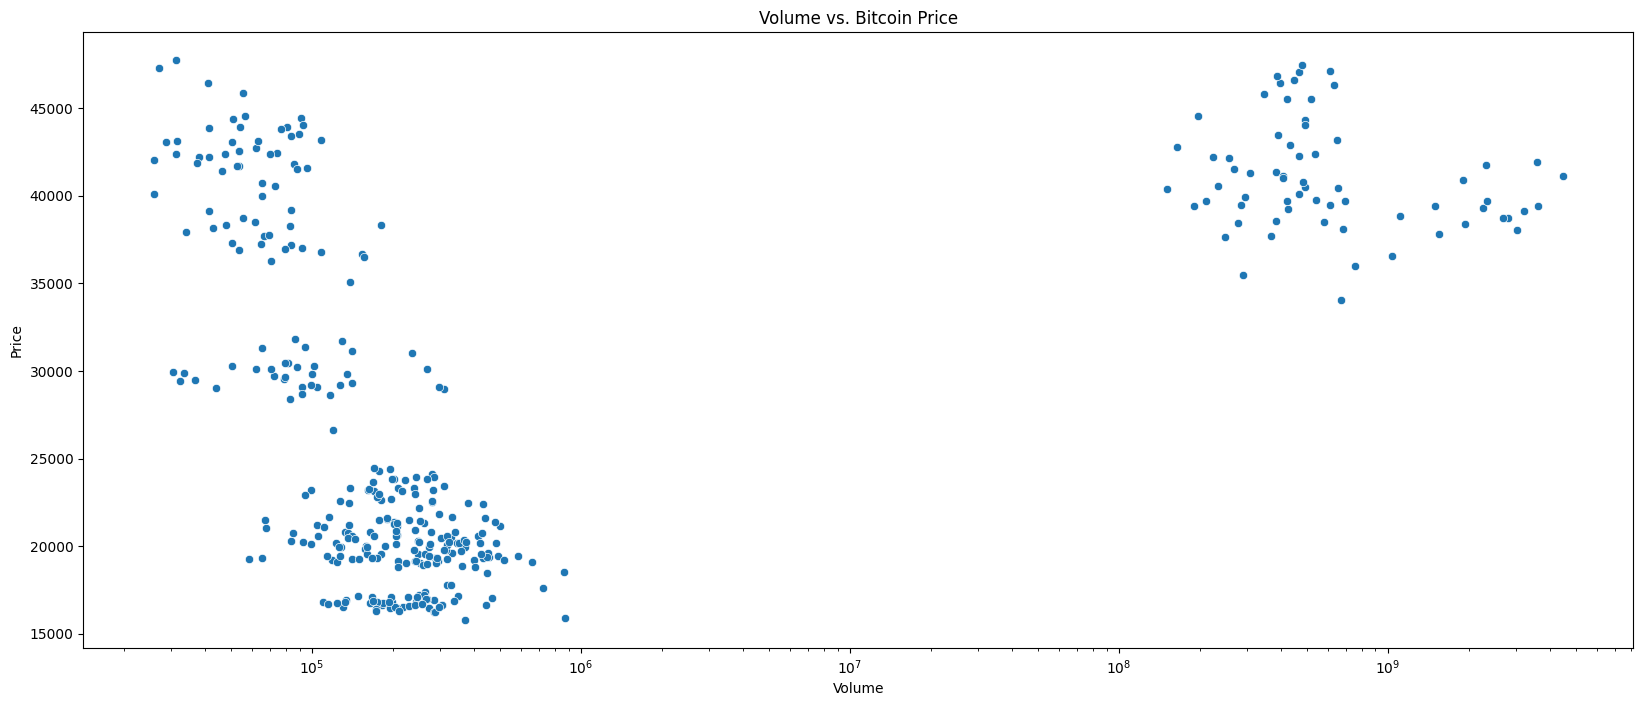

Mean Squared Error: 168422.5260118523


In [ ]:


# Data 
data = pd.read_csv('bitcoin_data.csv')


# Convert volume values to numeric by replacing 'K', 'M', 'B' with appropriate exponents
numeric_columns = ['Price', 'Open', 'High', 'Low', 'Vol.']
for column in numeric_columns:
    data[column] = data[column].str.replace(',', '')
    data[column] = data[column].str.replace('K', 'e3')
    data[column] = data[column].str.replace('M', 'e6')
    data[column] = data[column].str.replace('B', 'e9')
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Example: Visualizing Bitcoin prices over time
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Day'] = data['Date'].dt.day

plt.figure(figsize=(20, 8))
sns.lineplot(x='Date', y='Price', data=data, label='Bitcoin Prices')

# Trend line
reg_line = np.polyfit(data.index, data['Price'], 1)
trend_line = np.poly1d(reg_line)
plt.plot(data['Date'], trend_line(data.index), color='red', label='Trend Line')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Prices Over Time')

# Format x-axis to display month and year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Step 4: Seasonal analysis
# Calculate average price by month
seasonal_data = data.groupby(['Month', 'Date'])['Price'].mean().reset_index()

# Step 5: Visualization
months = range(1, 13)
num_cols = 4
num_rows = (len(months) - 1) // num_cols + 1


# Price variation per month
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

for i, month in enumerate(months):
    month_data = seasonal_data[seasonal_data['Month'] == month]
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.lineplot(x='Date', y='Price', data=month_data, ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel('Average Price')
    ax.set_title('Bitcoin Price Variation - Month ' + str(month))
    ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()




# Step 6: Visualization in Python
# Example: Visualizing the relationship between a feature and Bitcoin prices
plt.figure(figsize=(20, 8))
plt.xscale('log')  # Apply logarithmic scale to the x-axis for better visualization, it was quite cramped to the left side
sns.scatterplot(x='Vol.', y='Price', data=data)
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('Volume vs. Bitcoin Price')
plt.show()



# Example: Using linear regression
X = data[["Open", "High", "Low", "Vol."]]  # Select relevant features
y = data["Price"]  # Target variable

model = LinearRegression()
model.fit(X, y)

# Model evaluation and testing
# Evaluating the model using mean squared error

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print('Mean Squared Error:', mse)

There are alot of factors that can change the value of Bitcoin. Problem with Bitcoin and other crypto currencies is that you can't predict how it will go based on the success of a company like normal stocks. One could say its a lot more volatile and undpredictable. 

The predicting of cryptos can be somewhat connected to celebrities and their influence. Imagine if Elon Musk suddenly chooses to buy alot of Bitcoin and it were to be known, there would probably be quite a bandwagon of people buying Bitcoin and pushing up the prices. And what happens when prices rise? People start selling or keeping it thinking they will be even richer. But what then when the same Elon Musk chooses to sell, I'm doubtful Elon would buy a small amount so when he sells it would show. That sudden drop might lead to panic selling in the masses.

I have put up the monthly prices in seperate graphs and it was quite obvious that there would be no similarities, at least not a pattern. There might be two months that look similiar but at that point it's still a coincidence. 

It's quite interesting that that volume of Bitcoin doesn't really change the prices as one would think. The graph shows that the price can be in the 40k's even if at both e9 and e6. One would think that the more there is of something the less it's value per piece is, good old reliable supply and demand. Bitcoin kind of ignores all the normal traits of "stocks" and such, same with all cryptos. 

The massive crash in Bitcoin over the year 2022 is quite hard to put a finger on why, because of cryptos unpredictable nature. One massive selling after another can lead to a massive domino effect, this goes both ways.